In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import torch

from src import get_device, read_dicom, Detector, Siddon

In [2]:
# Read in the volume
volume, spacing = read_dicom("../data/cxr/", fix_zero=False)

# Get parameters for the detector
bx, by, bz = np.array(volume.shape) * np.array(spacing) / 2
detector_kwargs = {
    "sdr"   : 300.0,
    "theta" : torch.pi,
    "phi"   : 0,
    "gamma" : torch.pi / 3,
    "bx"    : bx,
    "by"    : by,
    "bz"    : bz,
}

device = get_device("cuda")

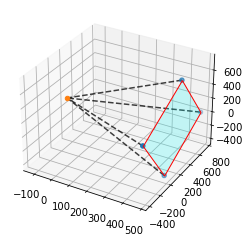

In [3]:
detector = Detector(device=device, **detector_kwargs)
source, rays = detector.make_xrays(200, 200, 1.4e-2, 1.4e-2)

# Plot the detector plane
v0 = rays[0, 0, :].detach().cpu().numpy()
v1 = rays[-1, 0, :].detach().cpu().numpy()
v2 = rays[0, -1, :].detach().cpu().numpy()
v3 = rays[-1, -1, :].detach().cpu().numpy()

pts = np.array([v0, v1, v2, v3])

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter3D(pts[:, 0], pts[:, 1], pts[:, 2])
verts = [[pts[0], pts[1], pts[3], pts[2]]]
ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.2))

# Plot the source
source = source.detach().cpu().numpy()
ax.scatter3D(source[0], source[1], source[2])

# Plot the rays
for pt in pts:
    ax.plot3D([pt[0], source[0]], [pt[1], source[1]], [pt[2], source[2]], "k--", alpha=0.75)

plt.show()